In [2]:
import numpy as np
data = np.loadtxt('train (1).csv', delimiter = ',')
data.shape

(7176, 5)

In [6]:
x = data[:, 0].reshape(-1,1)
y = data[:, 1]

In [8]:
print(x.shape)
print(y.shape)

(7176, 1)
(7176,)


In [9]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5382, 1)
(1794, 1)
(5382,)
(1794,)


In [10]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()

In [166]:
y_pred = alg1.predict(x_test)
y_pred

array([61.88892733, 65.68518419, 58.7397597 , ..., 48.63078782,
       56.88477055, 75.34838349])

In [14]:
y_pred.shape

(1794,)

In [15]:
print('Value of m: ', alg1.coef_[0])
print('Value of c: ', alg1.intercept_)
print('Score of training data: ', alg1.score(x_train, y_train))
print('Score of testing data: ', alg1.score(x_test, y_test))

Value of m:  1.4379760855704034
Value of c:  26.112082317333574
Score of training data:  0.7149832175061657
Score of testing data:  0.7133449975220283


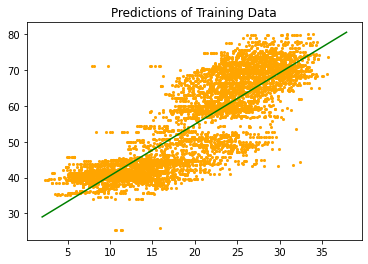

In [83]:
import matplotlib.pyplot as plt
m = alg1.coef_[0]
c = alg1.intercept_
x_line = np.arange(start = 2, stop = 38, step = 0.1)
y_line = m * x_line + c

plt.scatter(x_train, y_train, linewidths = 0.1, c = 'orange', marker = '.')
plt.plot(x_line, y_line, 'green')
plt.title('Predictions of Training Data')
plt.show()

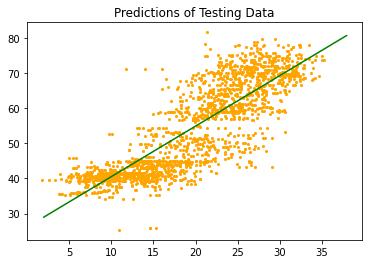

In [85]:
m = alg1.coef_[0]
c = alg1.intercept_
x_line = np.arange(start = 2, stop = 38, step = 0.1)
y_line = m * x_line + c

plt.scatter(x_test, y_test, linewidths = 0.1, c = 'orange', marker = '.')
plt.plot(x_line, y_line, 'green')
plt.title('Predictions of Testing Data')
plt.show()

In [161]:
def run():
    data = np.loadtxt('train (1).csv', delimiter = ',')
    learning_rate = 0.001
    num_iterations = 100
    m, c = gd(data, learning_rate, num_iterations)
    print(m, c)

In [162]:
def gd(points, learning_rate, num_iterations):
    m = 0
    c = 0
    for i in range(num_iterations):
        m, c = step_gradient(points, learning_rate, m, c)
        print(i, 'Cost:', cost(points, m, c))
    return m, c

In [163]:
def step_gradient(points, learning_rate, m, c):
    m_slope = 0
    c_slope = 0
    M = len(points)
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        m_slope += (-2/M) * (y - m * x - c) * x
        c_slope += (-2/M) * (y - m * x - c)
    new_m = m - learning_rate * m_slope
    new_c = c - learning_rate * c_slope
    return new_m, new_c

In [164]:
def cost(points, m, c):
    total_cost = 0
    M = len(points)
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (1/M) * ((y - m * x - c) ** 2)
    return total_cost

In [165]:
run()

0 Cost: 171.04969796484508
1 Cost: 131.5604585821987
2 Cost: 130.98818163556638
3 Cost: 130.93831400020443
4 Cost: 130.89548006422015
5 Cost: 130.85276185597576
6 Cost: 130.81006650376898
7 Cost: 130.76739275020148
8 Cost: 130.72474056763375
9 Cost: 130.68210994493677
10 Cost: 130.6395008712099
11 Cost: 130.59691333555958
12 Cost: 130.55434732709944
13 Cost: 130.5118028349477
14 Cost: 130.46927984822779
15 Cost: 130.4267783560707
16 Cost: 130.38429834761047
17 Cost: 130.3418398119861
18 Cost: 130.29940273834492
19 Cost: 130.2569871158381
20 Cost: 130.2145929336235
21 Cost: 130.17222018086088
22 Cost: 130.12986884672063
23 Cost: 130.08753892037464
24 Cost: 130.0452303910023
25 Cost: 130.00294324778713
26 Cost: 129.96067747992004
27 Cost: 129.91843307659508
28 Cost: 129.87621002701331
29 Cost: 129.8340083203805
30 Cost: 129.7918279459092
31 Cost: 129.74966889281464
32 Cost: 129.70753115032042
33 Cost: 129.6654147076549
34 Cost: 129.62331955405102
35 Cost: 129.58124567874748
36 Cost: 129.

In [172]:
def predict(m, x, c):
    return m * x + c

In [185]:
import pandas as pd
df = pd.DataFrame(x_test)
y_pred = predict(m, x_test, c)
print(y_pred)

[[61.88892733]
 [65.68518419]
 [58.7397597 ]
 ...
 [48.63078782]
 [56.88477055]
 [75.34838349]]


In [186]:
np.savetxt('Predictions.csv', y_pred, fmt = '%.8f')